Exploratory analysis of releasing particles near a topographic boundary

To characterize the interaction of the flow with a complex topography like a coral reef, I am going to release particles near the boundary and track them forwards and backwards in time. This notebook is designed to outline a structure for the study.
First let's import the necessary modules

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, ScipyParticle, AdvectionRK4_3D, ErrorCode
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from netCDF4 import Dataset,num2date,date2num
from explfunctions import deleteparticle

Now we are going to obtain flowfields in netcdf form

Because the netcdf input requires lat and lon data while we only have one and depth, we are going to read from data

In [2]:
corald = Dataset('output-corals-regridded.nc', 'r+',format='NETCDF4')
T = corald.variables['T'][:]
X = corald.variables['X'][:]
Y = corald.variables['Y'][:]
U = corald.variables['U'][:]
V = corald.variables['V'][:]

In [3]:
U = np.asarray(U)
U = np.expand_dims(U,2)

V = np.asarray(V)
V = np.expand_dims(V,2)
V.shape
U.shape

(61, 100, 1, 900)

In [23]:
t = num2date(T,units='seconds since 2000-01-01 00:00:00.0')
t = date2num(t,units='seconds since 2000-01-01 00:00:00.0')
print(t[1])
print(X[30])

1.0
-0.2


In [5]:
twoDcoral = Dataset('2Dcoral.nc','w',format = 'NETCDF4')
time = twoDcoral.createDimension('time',len(T))
x = twoDcoral.createDimension('x',len(X))
y = twoDcoral.createDimension('y',3)
depth =twoDcoral.createDimension('depth',len(Y))

times = twoDcoral.createVariable('time','float64',('time',))
times.units = 's'
times[:] = t
xs = twoDcoral.createVariable('x','float64',('x',))
xs.units = 'm'
xs[:] = X
ys = twoDcoral.createVariable('y','float64',('y',))
ys.units = 'm'
ys[:] = [0,1,2]
depths = twoDcoral.createVariable('depth','float64',('depth',))
depths.units = 'm'
depths[:] = Y
u = twoDcoral.createVariable('u','float64',('time','depth','y','x'))
u.units = 'm/s'
u[:,:,1,:] = U
v = twoDcoral.createVariable('v','float64',('time','depth','y','x'))
v.units = 'm/s'
v[:,:,:,:] = np.zeros(v.shape)
w = twoDcoral.createVariable('w','float64',('time','depth','y','x'))
w.units = 'm/s'
w[:,:,1,:] = V

In [6]:
filenames = '2Dcoral.nc'
variables = {'U': 'u',
             'V': 'v',
             'W': 'w'}
dimensions = {'lon':'x',
              'lat':'y',
              'depth':'depth',
              'time':'time'}
fieldset = FieldSet.from_netcdf(filenames,variables,dimensions,mesh='flat',deferred_load=False)

To check what the domain of the field is and what kind of velocities we have we are going to show the fields

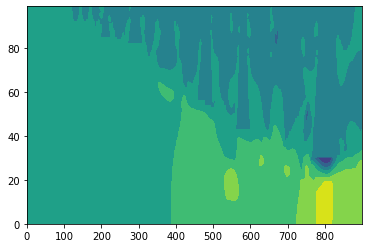

In [8]:
plt.contourf(fieldset.U.data[8,:,1,:])

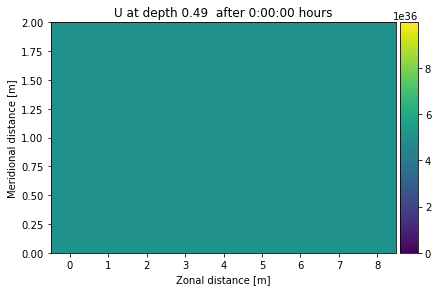

In [29]:
fieldset.U.show()

As a first test, we are going to release particles near an open boundary.

In [25]:
nPart = 10
pset = ParticleSet.from_list(fieldset=fieldset,
                            pclass=ScipyParticle,
                            lon=[0]*nPart,
                            lat=[1]*nPart,
                             depth=np.linspace(-0.2,0.4,nPart))

In [27]:
print(pset)

P[10](lon=0.000000, lat=1.000000, depth=-0.200000, lon=0.000000, lat=1.000000, depth=-0.200000, time=nan, id=10.000000, time=not_yet_set)
P[11](lon=0.000000, lat=1.000000, depth=-0.133333, lon=0.000000, lat=1.000000, depth=-0.133333, time=nan, id=11.000000, time=not_yet_set)
P[12](lon=0.000000, lat=1.000000, depth=-0.066667, lon=0.000000, lat=1.000000, depth=-0.066667, time=nan, id=12.000000, time=not_yet_set)
P[13](lon=0.000000, lat=1.000000, depth=0.000000, lon=0.000000, lat=1.000000, depth=0.000000, time=nan, id=13.000000, time=not_yet_set)
P[14](lon=0.000000, lat=1.000000, depth=0.066667, lon=0.000000, lat=1.000000, depth=0.066667, time=nan, id=14.000000, time=not_yet_set)
P[15](lon=0.000000, lat=1.000000, depth=0.133333, lon=0.000000, lat=1.000000, depth=0.133333, time=nan, id=15.000000, time=not_yet_set)
P[16](lon=0.000000, lat=1.000000, depth=0.200000, lon=0.000000, lat=1.000000, depth=0.200000, time=nan, id=16.000000, time=not_yet_set)
P[17](lon=0.000000, lat=1.000000, depth=0.

In [28]:
pset.execute(AdvectionRK4_3D,
             runtime=timedelta(seconds=5),
             dt=timedelta(seconds=0.01),
             recovery = {ErrorCode.ErrorOutOfBounds:deleteparticle},
             output_file=pset.ParticleFile(name="test10.nc", outputdt=timedelta(seconds=0.01))
            )

Particle 10 has died at t = 0.0
Particle 11 has died at t = 0.0
Particle 12 has died at t = 0.0
Particle 13 has died at t = 0.0
Particle 14 has died at t = 0.0
Particle 15 has died at t = 0.0
Particle 16 has died at t = 0.0
Particle 17 has died at t = 0.0
Particle 18 has died at t = 0.0
Particle 19 has died at t = 0.0


INFO: Temporary output files are stored in out-AZCBNFEY.
INFO: You can use "parcels_convert_npydir_to_netcdf out-AZCBNFEY" to convert these to a NetCDF file during the run.
N/A% (0 of 5.0) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 14% (0.7400000000000004 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:00
 15% (0.7500000000000004 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (0.7600000000000005 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:02
 15% (0.7700000000000005 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:03
 15% (0.7800000000000005 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:04
 15% (0.7900000000000005 of 5.0) |#      | Elapsed Time: 0:00:00 ETA:   0:00:05
 16% (0.8000000000000005 of 5.0) |#      | Elapsed Time: 0:00:01 ETA:   0:00:05
 16% (0.8100000000000005 of 5.0) |#      | Elapsed Time: 0:00:01 ETA:   0:00:06
 16% (0.8200000000000005 of 5.0) |#      | Elapsed Time: 0:00:01 ETA:   0:00:07
 16% (0.8300000000000005 of

 19% (0.9800000000000006 of 5.0) |#      | Elapsed Time: 0:00:03 ETA:   0:01:03
 19% (0.9900000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:01:02
 20% (1.0000000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:01:01
 20% (1.0100000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:01:00
 20% (1.0200000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:00:59
 20% (1.0300000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:00:58
 20% (1.0400000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:00:57
 21% (1.0500000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:00:56
 21% (1.0600000000000007 of 5.0) |#      | Elapsed Time: 0:00:04 ETA:   0:00:54
 21% (1.0700000000000007 of 5.0) |#      | Elapsed Time: 0:00:05 ETA:   0:00:53
 21% (1.0800000000000007 of 5.0) |#      | Elapsed Time: 0:00:05 ETA:   0:00:52
 21% (1.0900000000000007 of 5.0) |#      | Elapsed Time: 0:00:05 ETA:   0:00:52
 22% (1.1000000000000008 of 5.0) |#     

 31% (1.5500000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:49
 31% (1.5600000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:48
 31% (1.5700000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:48
 31% (1.5800000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:49
 31% (1.5900000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:49
 32% (1.6000000000000012 of 5.0) |##     | Elapsed Time: 0:00:12 ETA:   0:00:48
 32% (1.6100000000000012 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:48
 32% (1.6200000000000012 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:48
 32% (1.6300000000000012 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:48
 32% (1.6400000000000012 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:47
 33% (1.6500000000000012 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:47
 33% (1.6600000000000013 of 5.0) |##     | Elapsed Time: 0:00:13 ETA:   0:00:48
 33% (1.6700000000000013 of 5.0) |##    

 42% (2.1299999999999986 of 5.0) |##     | Elapsed Time: 0:00:20 ETA:   0:00:40
 42% (2.1399999999999983 of 5.0) |##     | Elapsed Time: 0:00:20 ETA:   0:00:40
 42% (2.149999999999998 of 5.0) |###     | Elapsed Time: 0:00:20 ETA:   0:00:41
 43% (2.159999999999998 of 5.0) |###     | Elapsed Time: 0:00:20 ETA:   0:00:39
 43% (2.1699999999999977 of 5.0) |###    | Elapsed Time: 0:00:20 ETA:   0:00:39
 43% (2.1799999999999975 of 5.0) |###    | Elapsed Time: 0:00:21 ETA:   0:00:39
 43% (2.1899999999999973 of 5.0) |###    | Elapsed Time: 0:00:21 ETA:   0:00:39
 43% (2.199999999999997 of 5.0) |###     | Elapsed Time: 0:00:21 ETA:   0:00:39
 44% (2.209999999999997 of 5.0) |###     | Elapsed Time: 0:00:21 ETA:   0:00:39
 44% (2.2199999999999966 of 5.0) |###    | Elapsed Time: 0:00:21 ETA:   0:00:40
 44% (2.2299999999999964 of 5.0) |###    | Elapsed Time: 0:00:21 ETA:   0:00:39
 44% (2.239999999999996 of 5.0) |###     | Elapsed Time: 0:00:21 ETA:   0:00:38
 44% (2.249999999999996 of 5.0) |###    

 53% (2.6999999999999864 of 5.0) |###    | Elapsed Time: 0:00:28 ETA:   0:00:33
 54% (2.709999999999986 of 5.0) |####    | Elapsed Time: 0:00:28 ETA:   0:00:33
 54% (2.719999999999986 of 5.0) |####    | Elapsed Time: 0:00:28 ETA:   0:00:32
 54% (2.7299999999999858 of 5.0) |###    | Elapsed Time: 0:00:28 ETA:   0:00:32
 54% (2.7399999999999856 of 5.0) |###    | Elapsed Time: 0:00:28 ETA:   0:00:31
 54% (2.7499999999999853 of 5.0) |###    | Elapsed Time: 0:00:28 ETA:   0:00:31
 55% (2.759999999999985 of 5.0) |####    | Elapsed Time: 0:00:29 ETA:   0:00:31
 55% (2.769999999999985 of 5.0) |####    | Elapsed Time: 0:00:29 ETA:   0:00:31
 55% (2.7799999999999847 of 5.0) |###    | Elapsed Time: 0:00:29 ETA:   0:00:31
 55% (2.7899999999999845 of 5.0) |###    | Elapsed Time: 0:00:29 ETA:   0:00:31
 55% (2.7999999999999843 of 5.0) |###    | Elapsed Time: 0:00:29 ETA:   0:00:31
 56% (2.809999999999984 of 5.0) |####    | Elapsed Time: 0:00:29 ETA:   0:00:31
 56% (2.819999999999984 of 5.0) |####   

 65% (3.279999999999974 of 5.0) |#####   | Elapsed Time: 0:00:36 ETA:   0:00:28
 65% (3.289999999999974 of 5.0) |#####   | Elapsed Time: 0:00:37 ETA:   0:00:27
 65% (3.2999999999999736 of 5.0) |####   | Elapsed Time: 0:00:37 ETA:   0:00:27
 66% (3.3099999999999734 of 5.0) |####   | Elapsed Time: 0:00:37 ETA:   0:00:27
 66% (3.319999999999973 of 5.0) |#####   | Elapsed Time: 0:00:37 ETA:   0:00:27
 66% (3.329999999999973 of 5.0) |#####   | Elapsed Time: 0:00:37 ETA:   0:00:27
 66% (3.3399999999999728 of 5.0) |####   | Elapsed Time: 0:00:37 ETA:   0:00:26
 66% (3.3499999999999726 of 5.0) |####   | Elapsed Time: 0:00:37 ETA:   0:00:26
 67% (3.3599999999999723 of 5.0) |####   | Elapsed Time: 0:00:38 ETA:   0:00:25
 67% (3.369999999999972 of 5.0) |#####   | Elapsed Time: 0:00:38 ETA:   0:00:25
 67% (3.379999999999972 of 5.0) |#####   | Elapsed Time: 0:00:38 ETA:   0:00:24
 67% (3.3899999999999717 of 5.0) |####   | Elapsed Time: 0:00:38 ETA:   0:00:24
 67% (3.3999999999999715 of 5.0) |####  

 76% (3.849999999999962 of 5.0) |######  | Elapsed Time: 0:00:45 ETA:   0:00:17
 77% (3.8599999999999617 of 5.0) |#####  | Elapsed Time: 0:00:45 ETA:   0:00:17
 77% (3.8699999999999615 of 5.0) |#####  | Elapsed Time: 0:00:45 ETA:   0:00:16
 77% (3.8799999999999613 of 5.0) |#####  | Elapsed Time: 0:00:45 ETA:   0:00:17
 77% (3.889999999999961 of 5.0) |######  | Elapsed Time: 0:00:45 ETA:   0:00:17
 77% (3.899999999999961 of 5.0) |######  | Elapsed Time: 0:00:46 ETA:   0:00:17
 78% (3.9099999999999606 of 5.0) |#####  | Elapsed Time: 0:00:46 ETA:   0:00:18
 78% (3.9199999999999604 of 5.0) |#####  | Elapsed Time: 0:00:46 ETA:   0:00:18
 78% (3.92999999999996 of 5.0) |#######  | Elapsed Time: 0:00:46 ETA:   0:00:19
 78% (3.93999999999996 of 5.0) |#######  | Elapsed Time: 0:00:46 ETA:   0:00:19
 78% (3.9499999999999598 of 5.0) |#####  | Elapsed Time: 0:00:47 ETA:   0:00:19
 79% (3.9599999999999596 of 5.0) |#####  | Elapsed Time: 0:00:47 ETA:   0:00:19
 79% (3.9699999999999593 of 5.0) |##### 

 88% (4.42999999999995 of 5.0) |#######  | Elapsed Time: 0:00:55 ETA:   0:00:09
 88% (4.43999999999995 of 5.0) |#######  | Elapsed Time: 0:00:55 ETA:   0:00:09
 88% (4.4499999999999496 of 5.0) |###### | Elapsed Time: 0:00:55 ETA:   0:00:09
 89% (4.459999999999949 of 5.0) |####### | Elapsed Time: 0:00:55 ETA:   0:00:08
 89% (4.469999999999949 of 5.0) |####### | Elapsed Time: 0:00:55 ETA:   0:00:08
 89% (4.479999999999949 of 5.0) |####### | Elapsed Time: 0:00:56 ETA:   0:00:08
 89% (4.489999999999949 of 5.0) |####### | Elapsed Time: 0:00:56 ETA:   0:00:08
 89% (4.4999999999999485 of 5.0) |###### | Elapsed Time: 0:00:56 ETA:   0:00:08
 90% (4.509999999999948 of 5.0) |####### | Elapsed Time: 0:00:56 ETA:   0:00:08
 90% (4.519999999999948 of 5.0) |####### | Elapsed Time: 0:00:56 ETA:   0:00:08
 90% (4.529999999999948 of 5.0) |####### | Elapsed Time: 0:00:56 ETA:   0:00:07
 90% (4.539999999999948 of 5.0) |####### | Elapsed Time: 0:00:57 ETA:   0:00:07
 90% (4.549999999999947 of 5.0) |#######

 99% (4.999999999999938 of 5.0) |####### | Elapsed Time: 0:01:04 ETA:   0:00:00
100% (5.0 of 5.0) |######################| Elapsed Time: 0:01:04 ETA:  00:00:00
100% (5.0 of 5.0) |######################| Elapsed Time: 0:01:04 Time:  0:01:04


P[0](lon=0.000540, lat=-0.199995, depth=0.000000, lon=0.000540, lat=-0.199995, depth=0.000000, time=60.000000, id=0.000000, time=60.000000)
P[1](lon=0.000540, lat=-0.049995, depth=0.000000, lon=0.000540, lat=-0.049995, depth=0.000000, time=60.000000, id=1.000000, time=60.000000)
P[2](lon=0.000540, lat=0.100005, depth=0.000000, lon=0.000540, lat=0.100005, depth=0.000000, time=60.000000, id=2.000000, time=60.000000)
P[3](lon=0.000545, lat=0.250005, depth=0.000000, lon=0.000545, lat=0.250005, depth=0.000000, time=60.000000, id=3.000000, time=60.000000)
P[4](lon=0.000545, lat=0.400000, depth=0.000000, lon=0.000545, lat=0.400000, depth=0.000000, time=60.000000, id=4.000000, time=60.000000)


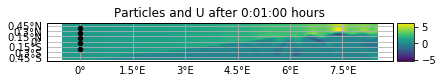

In [14]:
print(pset)

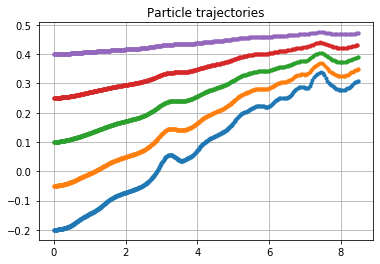

In [26]:
plotTrajectoriesFile('test8.nc');

In [21]:
plotTrajectoriesFile('test7.nc',
                     tracerfile=filenames,
                     tracerlon='X',
                     tracerlat='Y',
                     tracerfield='U');

ValueError: could not broadcast input array from shape (61,100,900) into shape (1,100,900)

Now, we are going to try to release the particles close to the bottom boundary